In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats as st
from sklearn.linear_model import LinearRegression

In [2]:
emp = pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Data Science\\Assignments\\Simple Linear Regression\\emp_data.csv")

In [3]:
emp.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


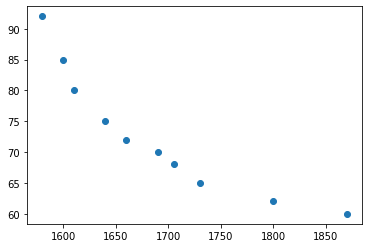

In [4]:
plt.scatter(emp.Salary_hike,emp.Churn_out_rate)

### Model 1

In [5]:
model1 = LinearRegression()

In [6]:
model1.fit(emp.Salary_hike.values.reshape(-1,1),emp.Churn_out_rate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
pred1 = model1.predict(emp.Salary_hike.values.reshape(-1,1))

In [8]:
pred1

array([83.9275313 , 81.89667839, 80.88125193, 77.83497257, 75.80411966,
       72.7578403 , 71.13315797, 68.69613448, 61.5881493 , 54.48016412])

In [9]:
# Adjusted R-Squared value
model1.score(emp.Salary_hike.values.reshape(-1,1),emp.Churn_out_rate)

0.8312363099883749

In [10]:
rmse1 = np.sqrt(np.mean((pred1-emp.Churn_out_rate)**2))

In [11]:
rmse1

3.9975284623377942

In [12]:
model1.coef_

array([-0.10154265])

In [13]:
model1.intercept_

244.36491110400797

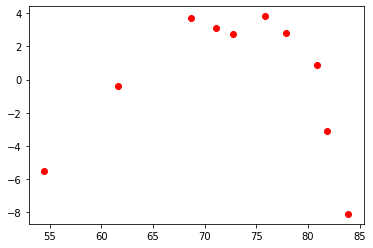

In [14]:
#### Residuals Vs Fitted values
plt.scatter(pred1,(pred1-emp.Churn_out_rate),c="r")

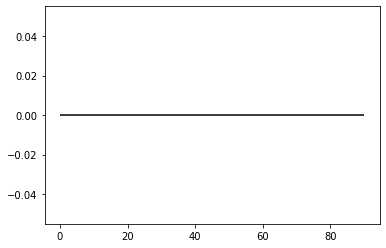

In [15]:
plt.hlines(y=0,xmin=0,xmax=90) 

(array([1., 0., 1., 0., 1., 0., 1., 1., 0., 5.]),
 array([-8.0724687 , -6.88480987, -5.69715103, -4.5094922 , -3.32183336,
        -2.13417452, -0.94651569,  0.24114315,  1.42880199,  2.61646082,
         3.80411966]),
 <a list of 10 Patch objects>)

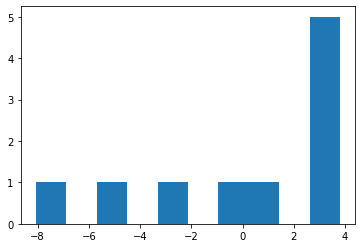

In [16]:
# checking normal distribution for residual
plt.hist(pred1-emp.Churn_out_rate)

In [17]:
### Fitting Quadratic Regression 
emp["Salary_hike_sqrd"] = emp.Salary_hike*emp.Salary_hike

### Model 2

In [18]:
model2 = LinearRegression()
model2.fit(X = emp.iloc[:,[0,2]],y=emp.Churn_out_rate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
pred2 = model2.predict(emp.iloc[:,[0,2]])

In [20]:
pred2

array([89.17035172, 84.66326836, 82.55234317, 76.79003363, 73.42388227,
       69.08773773, 67.12501313, 64.63729902, 60.50952144, 61.04054953])

In [21]:
# Adjusted R-Squared value
model2.score(emp.iloc[:,[0,2]],emp.Churn_out_rate)

0.9737036006287824

In [22]:
rmse2 = np.sqrt(np.mean((pred2-emp.Churn_out_rate)**2))

In [23]:
rmse2

1.5779753028677594

In [24]:
model2.coef_

array([-1.73708907e+00,  4.75388334e-04])

In [25]:
model2.intercept_

1647.0116465250296

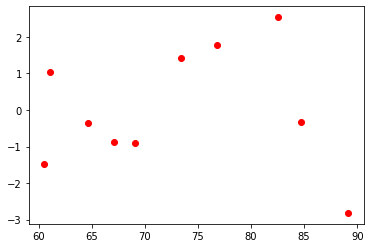

In [26]:
#### Residuals Vs Fitted values
plt.scatter(pred2,(pred2-emp.Churn_out_rate),c="r")

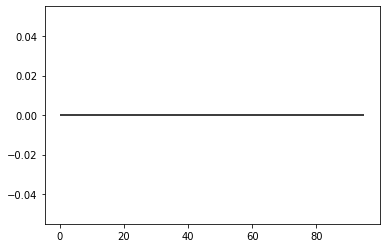

In [27]:
plt.hlines(y=0,xmin=0,xmax=95)  

(array([1., 0., 1., 2., 2., 0., 0., 2., 1., 1.]),
 array([-2.82964828, -2.29144914, -1.75324999, -1.21505084, -0.6768517 ,
        -0.13865255,  0.39954659,  0.93774574,  1.47594488,  2.01414403,
         2.55234317]),
 <a list of 10 Patch objects>)

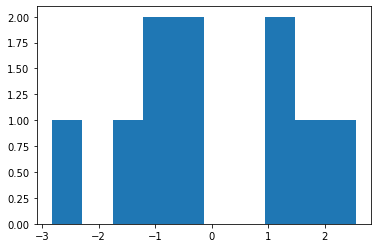

In [28]:
# Checking normal distribution
plt.hist(pred2-emp.Churn_out_rate)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-2.82964828, -1.49047856, -0.91226227, -0.87498687, -0.36270098,
         -0.33673164,  1.04054953,  1.42388227,  1.79003363,  2.55234317])),
 (1.785227535358057, -4.5514375102925403e-14, 0.9846548369766768))

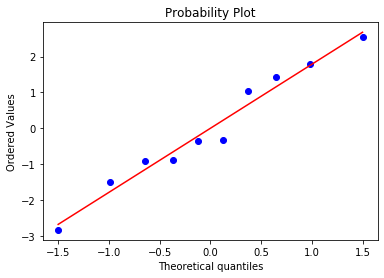

In [29]:
st.probplot(pred2-emp.Churn_out_rate,dist="norm",plot=pylab)

In [30]:
emp["Churn_out_rate_sqrt"] = np.sqrt(emp.Churn_out_rate)

### Model 3

In [31]:
model3 = LinearRegression()

In [32]:
model3.fit(X = emp.iloc[:,[0,2]],y=emp.Churn_out_rate_sqrt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
pred3 = model3.predict(emp.iloc[:,[0,2]])

In [34]:
pred3

array([9.45036351, 9.1968003 , 9.07777427, 8.75171851, 8.56019994,
       8.31169998, 8.19819368, 8.0527521 , 7.79865318, 7.79790319])

In [35]:
# Adjusted R-Squared value
model3.score(emp.iloc[:,[0,2]],emp.Churn_out_rate_sqrt)

0.9791126223079407

In [36]:
rmse3 = np.sqrt(np.mean(((pred3)**2-emp.Churn_out_rate)**2))

In [37]:
rmse3

1.4457754009536081

In [38]:
model3.coef_

array([-9.48873013e-02,  2.58519311e-05])

In [39]:
model3.intercept_

94.83553881548366

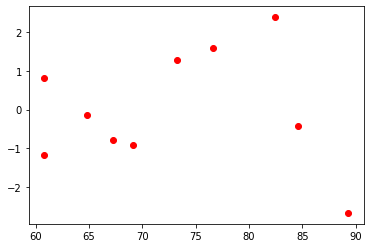

In [40]:
#### Residuals Vs Fitted values
plt.scatter((pred3)**2,((pred3)**2-emp.Churn_out_rate),c="r")

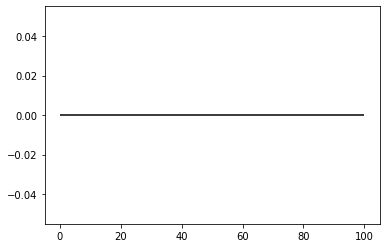

In [41]:
plt.hlines(y=0,xmin=0,xmax=100)  

(array([1., 0., 1., 2., 2., 0., 1., 1., 1., 1.]),
 array([-2.69062961, -2.18096808, -1.67130654, -1.16164501, -0.65198347,
        -0.14232194,  0.36733959,  0.87700113,  1.38666266,  1.8963242 ,
         2.40598573]),
 <a list of 10 Patch objects>)

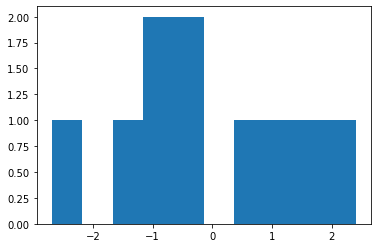

In [42]:
plt.hist((pred3)**2-emp.Churn_out_rate)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-2.69062961, -1.18100857, -0.9156435 , -0.78962032, -0.4188643 ,
         -0.15318364,  0.80729413,  1.27702303,  1.59257696,  2.40598573])),
 (1.638820811959777, -0.0066070095196018395, 0.9865652584265898))

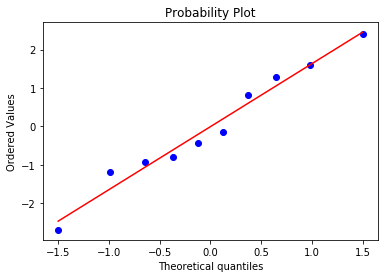

In [43]:
st.probplot((pred3)**2-emp.Churn_out_rate,dist="norm",plot=pylab)

### Model 4

In [44]:
model4 = LinearRegression()

In [45]:
model4.fit(X = emp.Salary_hike.values.reshape(-1,1),y=emp.Churn_out_rate_sqrt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
pred4 = model4.predict(emp.Salary_hike.values.reshape(-1,1))

In [47]:
pred4

array([9.16525547, 9.04635131, 8.98689923, 8.80854298, 8.68963882,
       8.51128257, 8.41615924, 8.27347425, 7.85730967, 7.4411451 ])

In [48]:
# Adjusted R-Squared value
model4.score(emp.Salary_hike.values.reshape(-1,1),emp.Churn_out_rate_sqrt)

0.8529916795621704

In [49]:
rmse4 = np.sqrt(np.mean(((pred4)**2-emp.Churn_out_rate)**2))

In [50]:
rmse4

3.7546988874896607

In [51]:
model4.coef_

array([-0.00594521])

In [52]:
model4.intercept_

18.558684390621327

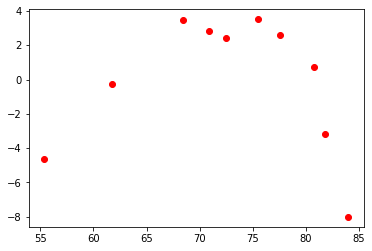

In [53]:
#### Residuals Vs Fitted values
plt.scatter((pred4)**2,((pred4)**2-emp.Churn_out_rate),c="r")

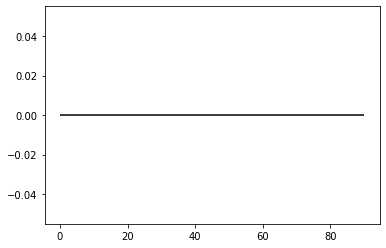

In [54]:
plt.hlines(y=0,xmin=0,xmax=90)  

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-7.9980921 , -4.62935956, -3.16352797, -0.26268467,  0.76435774,
          2.44193106,  2.59042948,  2.83173641,  3.45037612,  3.50982281])),
 (4.006228972320832, -0.046501068101260846, 0.9287195892441308))

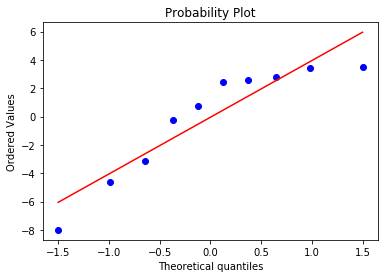

In [55]:
st.probplot((pred4)**2-emp.Churn_out_rate,dist="norm",plot=pylab)

(array([1., 0., 1., 0., 1., 0., 1., 1., 0., 5.]),
 array([-7.9980921 , -6.84730061, -5.69650912, -4.54571763, -3.39492614,
        -2.24413464, -1.09334315,  0.05744834,  1.20823983,  2.35903132,
         3.50982281]),
 <a list of 10 Patch objects>)

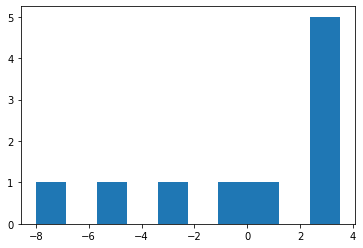

In [56]:
# Checking normal distribution for residuals 
plt.hist((pred4)**2-emp.Churn_out_rate)

### Model 3 has better R squared value compared to other models